
# **Data Cleaning and Analysis of FIFA 21 Players:**

This notebook presents a comprehensive data cleaning and analysis of the FIFA 21 player data set. The data set contains various attributes of players, including their overall rating, potential rating, value, wage, contract information, height, weight, and more.


## Import libraries

In [ ]:
# Importing necessary libraries
import pandas as pd               # For data manipulation
import numpy as np                # For numerical operations
import matplotlib.pyplot as plt   # For plotting
import re                         # For regular expressions (pattern matching)

In [ ]:
# Set an option to display all columns of the DataFrame
pd.set_option('display.max_columns', None)
# Read the CSV file into a DataFrame
data = pd.read_csv("/content/fifa21 raw data v2.csv")
# Display the first few rows of the DataFrame
data.head()

<ipython-input-72-c0917830e020>:4: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/fifa21 raw data v2.csv")


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,01-Jul-04,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,03-Aug-17,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [ ]:
# Retrieve the dimensions (shape) of the DataFrame
data.shape

(18979, 77)

In [ ]:
# Retrieve the column names of the DataFrame
data.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [ ]:
# Print summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [ ]:
# Loop through each column in the dataset
for col in data.columns:
    # Calculate the percentage of missing values in the column
    pct_missing = np.mean(data[col].isnull())

    # Print the column name and the percentage of missing values
    print(f"{col} ---> {pct_missing*100}%")  # Format: Column Name ---> Percentage of Missing Values

ID ---> 0.0%
Name ---> 0.0%
LongName ---> 0.0%
photoUrl ---> 0.0%
playerUrl ---> 0.0%
Nationality ---> 0.0%
Age ---> 0.0%
↓OVA ---> 0.0%
POT ---> 0.0%
Club ---> 0.0%
Contract ---> 0.0%
Positions ---> 0.0%
Height ---> 0.0%
Weight ---> 0.0%
Preferred Foot ---> 0.0%
BOV ---> 0.0%
Best Position ---> 0.0%
Joined ---> 0.0%
Loan Date End ---> 94.6625217345487%
Value ---> 0.0%
Wage ---> 0.0%
Release Clause ---> 0.0%
Attacking ---> 0.0%
Crossing ---> 0.0%
Finishing ---> 0.0%
Heading Accuracy ---> 0.0%
Short Passing ---> 0.0%
Volleys ---> 0.0%
Skill ---> 0.0%
Dribbling ---> 0.0%
Curve ---> 0.0%
FK Accuracy ---> 0.0%
Long Passing ---> 0.0%
Ball Control ---> 0.0%
Movement ---> 0.0%
Acceleration ---> 0.0%
Sprint Speed ---> 0.0%
Agility ---> 0.0%
Reactions ---> 0.0%
Balance ---> 0.0%
Power ---> 0.0%
Shot Power ---> 0.0%
Jumping ---> 0.0%
Stamina ---> 0.0%
Strength ---> 0.0%
Long Shots ---> 0.0%
Mentality ---> 0.0%
Aggression ---> 0.0%
Interceptions ---> 0.0%
Positioning ---> 0.0%
Vision ---> 0.0%
Pe

## **Data Cleaning**

1. **Creating a Copy:** We created a copy of the original data set to avoid modifying the original data.
2. **Cleaning Club Names:** We removed any trailing whitespace from the 'Club' column to ensure consistency.
3. **Contract Information:** We extracted the contract start date, contract end date, and contract length from the 'Contract' column using a custom function.
4. **Contract Category:** We created a new column called 'contract category' to classify players based on their contract status (Free, On Loan, or Contract).
5. **Height and Weight:** We converted all height values to centimeters and all weight values to kilograms.
6. **Value and Wage:** We removed the currency symbols and converted the values to millions and thousands, respectively.


In [ ]:
# Create a copy of the DataFrame 'data' and assign it to a new DataFrame 'df'
df = data.copy()
# Display a random sample of 5 rows from the DataFrame 'df'
df.sample(5)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
14841,255489,A. Shuartzman,Ariel Shuartzman,https://cdn.sofifa.com/players/255/489/21_60.png,http://sofifa.com/player/255489/ariel-shuartzm...,Paraguay,22,60,65,\n\n\n\nSportivo Luqueño,2020 ~ 2024,CM,173cm,67kg,Right,62,CAM,01-Jan-20,NaN,€375K,€500,€612K,241,48,57,38,62,36,253,56,36,37,59,65,304,66,57,58,60,63,273,41,66,57,49,60,259,37,57,60,60,45,42,153,42,59,52,53,11,15,14,7,6,1536,329,3 ★,2★,Medium,Medium,1 ★,61,53,56,59,51,49,1
1464,201976,A. Gomis,Alfred Gomis,https://cdn.sofifa.com/players/201/976/21_60.png,http://sofifa.com/player/201976/alfred-gomis/2...,Senegal,26,76,78,\n\n\n\nStade Rennais FC,2020 ~ 2025,GK,196cm,80kg,Right,76,GK,29-Sep-20,NaN,€7M,€30K,€12.8M,87,15,16,11,34,11,98,15,12,12,35,24,267,43,41,60,69,54,239,53,81,33,57,15,137,16,21,16,61,23,57,42,18,14,10,374,77,77,70,75,75,1244,416,3 ★,1★,Medium,Medium,1 ★,77,77,70,75,42,75,57
10594,230954,T. Kiš,Tomislav Kiš,https://cdn.sofifa.com/players/230/954/21_60.png,http://sofifa.com/player/230954/tomislav-kis/2...,Croatia,26,65,68,\n\n\n\nSeongnam FC,2017 ~ 2023,ST,180cm,75kg,Right,67,ST,27-Jul-17,NaN,€950K,€2K,€894K,290,42,72,62,57,57,256,65,47,43,34,67,327,67,71,67,59,63,329,62,67,72,62,66,254,50,24,62,55,63,50,67,34,16,17,47,12,7,12,8,8,1570,340,3 ★,2★,Medium,Medium,1 ★,69,67,49,65,28,62,1
15309,243122,I. Magnusson,Isak Magnusson,https://cdn.sofifa.com/players/243/122/21_60.png,http://sofifa.com/player/243122/isak-magnusson...,Sweden,22,60,71,\n\n\n\nKalmar FF,2015 ~ 2021,"CF, RM",179cm,68kg,Right,63,RM,01-Jan-15,NaN,€550K,€750,€508K,239,46,50,46,56,41,250,60,54,35,45,56,386,84,85,81,63,73,301,48,73,86,47,47,291,71,55,64,60,41,56,153,52,50,51,61,11,13,13,11,13,1681,362,3 ★,3★,High,High,1 ★,85,49,52,62,51,63,6
10515,198622,H. Hansson,Hallur Hansson,https://cdn.sofifa.com/players/198/622/21_60.png,http://sofifa.com/player/198622/hallur-hansson...,Faroe Islands,27,65,65,\n\n\n\nAC Horsens,2016 ~ 2021,"CM, ST",182cm,77kg,Right,66,CAM,20-Jun-16,NaN,€750K,€3K,€688K,288,56,62,45,66,59,316,64,64,60,63,65,368,74,74,76,63,81,351,72,58,90,65,66,321,82,52,68,65,54,65,144,48,53,43,52,14,10,10,9,9,1840,392,3 ★,3★,High,High,1 ★,74,65,63,66,50,74,4


In [ ]:
# Retrieve unique values from the 'Club' column in the DataFrame 'df'
unique_clubs = df['Club'].unique()

# Print the unique values
print(unique_clubs)

['\n\n\n\nFC Barcelona' '\n\n\n\nJuventus' '\n\n\n\nAtlético Madrid'
 '\n\n\n\nManchester City' '\n\n\n\nParis Saint-Germain'
 '\n\n\n\nFC Bayern München' '\n\n\n\nLiverpool' '\n\n\n\nReal Madrid'
 '\n\n\n\nChelsea' '\n\n\n\nTottenham Hotspur' '\n\n\n\nInter'
 '\n\n\n\nNapoli' '\n\n\n\nBorussia Dortmund' '\n\n\n\nManchester United'
 '\n\n\n\nArsenal' '\n\n\n\nLazio' '\n\n\n\nLeicester City'
 '\n\n\n\nBorussia Mönchengladbach' '\n\n\n\nReal Sociedad'
 '\n\n\n\nAtalanta' '\n\n\n\nOlympique Lyonnais' '\n\n\n\nMilan'
 '\n\n\n\nVillarreal CF' '\n\n\n\nRB Leipzig' '\n\n\n\nCagliari'
 '\n\n\n\nAjax' '\n\n\n\nSL Benfica' '\n\n\n\nAS Monaco'
 '\n\n\n\nWolverhampton Wanderers' '\n\n\n\nEverton' '\n\n\n\nFiorentina'
 '\n\n\n\nFC Porto' '\n\n\n\nRC Celta' '\n\n\n\nTorino'
 '\n\n\n\nSevilla FC' '\n\n\n\nGrêmio' '\n\n\n\nReal Betis' '\n\n\n\nRoma'
 '\n\n\n\nNewcastle United' '\n\n\n\nEintracht Frankfurt'
 '\n\n\n\nValencia CF' '\n\n\n\nMedipol Başakşehir FK'
 '\n\n\n\nInter Miami' '\n\n\n\nBayer 04 

In [ ]:
# Remove leading and trailing whitespaces from the 'Club' column in the DataFrame 'df'
df['Club'] = df['Club'].str.strip()
df.Club.unique()

array(['FC Barcelona', 'Juventus', 'Atlético Madrid', 'Manchester City',
       'Paris Saint-Germain', 'FC Bayern München', 'Liverpool',
       'Real Madrid', 'Chelsea', 'Tottenham Hotspur', 'Inter', 'Napoli',
       'Borussia Dortmund', 'Manchester United', 'Arsenal', 'Lazio',
       'Leicester City', 'Borussia Mönchengladbach', 'Real Sociedad',
       'Atalanta', 'Olympique Lyonnais', 'Milan', 'Villarreal CF',
       'RB Leipzig', 'Cagliari', 'Ajax', 'SL Benfica', 'AS Monaco',
       'Wolverhampton Wanderers', 'Everton', 'Fiorentina', 'FC Porto',
       'RC Celta', 'Torino', 'Sevilla FC', 'Grêmio', 'Real Betis', 'Roma',
       'Newcastle United', 'Eintracht Frankfurt', 'Valencia CF',
       'Medipol Başakşehir FK', 'Inter Miami', 'Bayer 04 Leverkusen',
       'Levante UD', 'Crystal Palace', 'Athletic Club de Bilbao',
       'Shanghai SIPG FC', 'VfL Wolfsburg',
       'Guangzhou Evergrande Taobao FC', 'Al Shabab',
       'Olympique de Marseille', 'Los Angeles FC',
       'Beijing Sino

In [ ]:
df['Contract'].dtype

dtype('O')

In [ ]:
df['Contract'].unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [ ]:
# Initialize a count variable to track the number of players on loan or free contracts
count = 0
# Iterate over each row in the DataFrame 'df'
for i, r in df.iterrows():
    # Check if the string 'On Loan' or 'Free' is present in the 'Contract' column for the current row
    if 'On Loan' in r['Contract'] or 'Free' in r['Contract']:
        # Increment the count if the condition is met
        count += 1
# Calculate the percentage of players on loan or free contracts
percentage = (count / df.shape[0]) * 100
# Print the percentage rounded to one decimal place
print(round(percentage, 1), "%")

6.6 %


In [ ]:
def contract_info(x):
    """
    Function to extract contract information from a string.

    Args:
    - x (str): Contract string containing contract details.

    Returns:
    - contract_start (datetime): Start date of the contract.
    - contract_end (datetime): End date of the contract.
    - contract_length (int): Length of the contract in years.
    """
    # Check if the player is on loan or has a free contract
    if 'On Loan' in x or 'Free' in x:
        # Set contract start and end dates to NaN and contract length to 0
        contract_start = np.nan
        contract_end = np.nan
        contract_length = 0
    else:
        # Extract years from the contract string using regular expression
        years = re.findall(r'\d{4}', x)

        # Convert years to datetime objects for contract start and end dates
        contract_start, contract_end = pd.to_datetime(years[0], format='%Y'), pd.to_datetime(years[1], format='%Y')

        # Calculate contract length in years
        contract_length = contract_end.year - contract_start.year + 1  # Adding 1 to include the ending year and the start year of the contract

    return contract_start, contract_end, contract_length

# Apply the contract_info function to the 'Contract' column and expand the result into separate columns
df[['Contract_Start', 'Contract_End', 'Contract_Length']] = df['Contract'].apply(contract_info).apply(pd.Series)


In [ ]:
df.head()

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract_Start,Contract_End,Contract_Length
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,01-Jul-04,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771,2004-01-01,2021-01-01,18.0
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562,2018-01-01,2022-01-01,5.0
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150,2014-01-01,2023-01-01,10.0
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207,2015-01-01,2023-01-01,9.0
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,03-Aug-17,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595,2017-01-01,2022-01-01,6.0


In [ ]:
# Get the index of the 'Contract' column
contract_index = df.columns.get_loc('Contract')

# Define the columns to move
columns_to_move = ['Contract_Start', 'Contract_End', 'Contract_Length']

# Relocate the columns beside the 'Contract' column
for column in columns_to_move:
    df.insert(loc=contract_index + 1, column=column, value=df.pop(column))
df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract_Length,Contract_End,Contract_Start,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,18.0,2021-01-01,2004-01-01,"RW, ST, CF",170cm,72kg,Left,93,RW,01-Jul-04,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,Juventus,2018 ~ 2022,5.0,2022-01-01,2018-01-01,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,10.0,2023-01-01,2014-01-01,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,Manchester City,2015 ~ 2023,9.0,2023-01-01,2015-01-01,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,6.0,2022-01-01,2017-01-01,"LW, CAM",175cm,68kg,Right,91,LW,03-Aug-17,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,Wuhan Zall,2018 ~ 2022,5.0,2022-01-01,2018-01-01,CB,178cm,66kg,Right,49,CB,13-Jul-18,NaN,€100K,€1K,€70K,145,23,26,43,26,27,142,27,23,21,29,42,294,68,60,69,46,51,221,36,57,54,50,24,192,48,50,28,28,38,44,147,45,52,50,45,7,8,5,14,11,1186,255,2 ★,2★,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,Oldham Athletic,2020 ~ 2021,2.0,2021-01-01,2020-01-01,CM,175cm,65kg,Right,51,CAM,01-Aug-20,NaN

In [ ]:
def contract_category(contract):
    """
    Function to categorize contract types.

    Args:
    - contract (str): Contract type.

    Returns:
    - category (str): Categorized contract type.
    """
    # Check if the contract type is "Free"
    if contract == "Free":
        return "Free"
    # Check if the contract type is "On Loan"
    elif contract == "On Loan":
        return "On Loan"
    else:
        # If not "Free" or "On Loan", categorize as "Contract"
        return "Contract"

In [ ]:
# Insert a new column 'contract category' after the 'Contract_Length' column,
# and populate it with contract categories using the contract_category function
df.insert(df.columns.get_loc("Contract_Length") + 1,  # Get the index of 'Contract_Length' column and add 1 to insert after it
          'contract_category',  # New column name
          df["Contract"].apply(contract_category))  # Apply contract_category function to 'Contract' column


In [ ]:
df.sample(5)

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Contract_Length,contract_category,Contract_End,Contract_Start,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
14025,256769,A. Truffert,Adrien Truffert,https://cdn.sofifa.com/players/256/769/21_60.png,http://sofifa.com/player/256769/adrien-truffer...,France,18,61,75,Stade Rennais FC,2019 ~ 2023,5.0,Contract,2023-01-01,2019-01-01,"LB, LM, CM",173cm,63kg,Left,61,LB,01-Jul-19,NaN,€725K,€2K,€1.2M,235,59,32,53,56,35,255,62,47,38,49,59,307,61,60,61,56,69,261,51,58,61,52,39,258,55,57,53,49,44,50,177,56,61,60,32,6,6,6,6,8,1525,326,3 ★,2★,Medium,Medium,1 ★,60,39,53,61,58,55,18
5651,238126,Guridi,Jon Guridi Aldalur,https://cdn.sofifa.com/players/238/126/21_60.png,http://sofifa.com/player/238126/jon-guridi-ald...,Spain,25,69,74,Real Sociedad,2014 ~ 2022,9.0,Contract,2022-01-01,2014-01-01,CM,179cm,64kg,Left,71,CM,01-Jul-14,NaN,€2M,€12K,€3M,267,44,67,43,75,38,301,70,45,45,72,69,332,64,65,64,66,73,292,51,44,70,61,66,281,48,67,61,62,43,63,177,53,71,53,53,12,8,9,11,13,1703,378,3 ★,3★,Medium,Medium,1 ★,65,61,63,69,60,60,17
7036,181436,D. Marcq,Damien Marcq,https://cdn.sofifa.com/players/181/436/21_60.png,http://sofifa.com/player/181436/damien-marcq/2...,France,31,68,68,SV Zulte-Waregem,2018 ~ 2021,4.0,Contract,2021-01-01,2018-01-01,"CDM, CM",182cm,76kg,Right,68,CDM,03-Jan-18,NaN,€850K,€6K,€1M,286,52,49,70,69,46,271,52,59,30,68,62,280,44,40,64,64,68,272,58,33,68,70,43,275,70,73,39,60,33,74,198,68,67,63,62,16,10,15,14,7,1644,345,3 ★,2★,Low,High,1 ★,42,48,61,58,68,68,3
13410,254590,Y. Reyes,Yonaiker Reyes,https://cdn.sofifa.com/players/254/590/21_60.png,http://sofifa.com/player/254590/yonaiker-reyes...,Venezuela,26,62,64,Llaneros de Guanare,2019 ~ 2024,6.0,Contract,2024-01-01,2019-01-01,"CAM, LW",165cm,60kg,Left,64,CAM,27-Jan-19,NaN,€500K,€500,€834K,279,55,60,49,60,55,311,62,60,65,61,63,316,76,74,58,61,47,292,58,59,57,63,55,261,48,33,61,60,59,55,154,48,57,49,55,10,13,7,13,12,1668,359,3 ★,3★,High,Medium,1 ★,75,58,59,61,48,58,2
8403,242654,J. Carbonero,Johan Carbonero,https://cdn.sofifa.com/players/242/654/21_60.png,http://sofifa.com/player/242654/johan-carboner...,Colombia,20,67,82,Gimnasia y Esgrima La Plata,2018 ~ 2022,5.0,Contract,2022-01-01,2018-01-01,"LM, RM",170cm,75kg,Right,68,RM,20-Jan-18,NaN,€2.5M,€5K,€3.5M,265,54,65,41,54,51,261,69,48,35,41,68,393,83,90,90,55,75,325,65,54,81,63,62,241,33,17,66,67,58,53,51,19,15,17,54,9,15,10,10,10,1590,353,3 ★,3★,Medium,Medium,1 ★,87,63,53,70,19,61,59


In [ ]:
df['Height'].unique()

array(['170cm', '187cm', '188cm', '181cm', '175cm', '184cm', '191cm',
       '178cm', '193cm', '185cm', '199cm', '173cm', '168cm', '176cm',
       '177cm', '183cm', '180cm', '189cm', '179cm', '195cm', '172cm',
       '182cm', '186cm', '192cm', '165cm', '194cm', '167cm', '196cm',
       '163cm', '190cm', '174cm', '169cm', '171cm', '197cm', '200cm',
       '166cm', '6\'2"', '164cm', '198cm', '6\'3"', '6\'5"', '5\'11"',
       '6\'4"', '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"',
       '5\'4"', '201cm', '158cm', '162cm', '161cm', '160cm', '203cm',
       '157cm', '156cm', '202cm', '159cm', '206cm', '155cm'], dtype=object)

In [ ]:
# Convert height values to centimeters
df['Height'] = df['Height'].apply(lambda x:
    int(x.split('\'')[0]) * 30.48 + int(x.split('\'')[1].replace('"', '')) * 2.54  # Convert feet and inches to centimeters if height is in feet and inches format
    if "'" in x  # Check if height is in feet and inches format
    else int(x.replace('cm', ''))  # Otherwise, convert height from centimeters to centimeters (remove 'cm' suffix)
    )

In [ ]:
df['Height'].unique()

array([170.  , 187.  , 188.  , 181.  , 175.  , 184.  , 191.  , 178.  ,
       193.  , 185.  , 199.  , 173.  , 168.  , 176.  , 177.  , 183.  ,
       180.  , 189.  , 179.  , 195.  , 172.  , 182.  , 186.  , 192.  ,
       165.  , 194.  , 167.  , 196.  , 163.  , 190.  , 174.  , 169.  ,
       171.  , 197.  , 200.  , 166.  , 187.96, 164.  , 198.  , 190.5 ,
       195.58, 180.34, 193.04, 185.42, 182.88, 177.8 , 175.26, 167.64,
       170.18, 162.56, 201.  , 158.  , 162.  , 161.  , 160.  , 203.  ,
       157.  , 156.  , 202.  , 159.  , 206.  , 155.  ])

In [ ]:
df.Weight.unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [ ]:
# Function to convert weight values to kilograms
def convert_to_kg(weight):
    """
    Convert weight values to kilograms.

    Args:
    - weight (str): Weight value with unit (kg or lbs).

    Returns:
    - float: Weight value in kilograms.
    """
    # Check if weight is in kilograms
    if 'kg' in weight:
        # If weight is in kilograms, remove 'kg' suffix and return as integer
        return int(weight.replace('kg', ''))
    # Check if weight is in pounds
    elif 'lbs' in weight:
        # If weight is in pounds, convert to kilograms and round to one decimal place
        return round(int(weight.replace('lbs', '')) * 0.453592, 1)


In [ ]:
df ['Weight'] = df["Weight"].apply(convert_to_kg)

In [ ]:
df['Weight'].unique()

array([ 72. ,  83. ,  87. ,  70. ,  68. ,  80. ,  71. ,  91. ,  73. ,
        85. ,  92. ,  69. ,  84. ,  96. ,  81. ,  82. ,  75. ,  86. ,
        89. ,  74. ,  76. ,  64. ,  78. ,  90. ,  66. ,  60. ,  94. ,
        79. ,  67. ,  65. ,  59. ,  61. ,  93. ,  88. ,  97. ,  77. ,
        62. ,  63. ,  95. , 100. ,  58. ,  81.2,  88.9,  79.8,  83.9,
        77.1,  92.1,  76.2,  66.2,  86.2,  78.9,  67.1,  74.8,  72.1,
        87.1,  82.1,  69.9,  71.2,  73.9,  98. , 103. ,  99. , 102. ,
        56. , 101. ,  57. ,  55. , 104. , 107. , 110. ,  53. ,  50. ,
        54. ,  52. ])

In [ ]:
# Rename columns 'Weight' and 'Height' to 'Weight (KG)' and 'Height (CM)' respectively
df = df.rename(columns={'Weight': 'Weight (KG)',
                        'Height': 'Height (CM)'})

# Display the first 20 columns after renaming
df.columns[:20]


Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Contract_Length',
       'contract_category', 'Contract_End', 'Contract_Start', 'Positions',
       'Height (CM)', 'Weight (KG)', 'Preferred Foot', 'BOV'],
      dtype='object')

In [ ]:
df.Value.unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [ ]:
def clean_value(value):
    """
    Clean the value string by removing the Euro symbol and converting to numeric value.

    Args:
    - value (str): Value string with Euro symbol and 'K' or 'M' suffix.

    Returns:
    - float: Numeric value in millions.
    """
    # Remove Euro symbol from the value string
    value = value.replace('€', '')

    # Check if 'K' is present in the value string
    if 'K' in value:
        # Convert 'K' values to millions
        return float(value.replace('K', '')) / 1000
    # Check if 'M' is present in the value string
    elif 'M' in value:
        # Convert 'M' values directly to numeric
        return float(value.replace('M', ''))
    else:
        # If no 'K' or 'M', convert value string to numeric
        return float(value)


In [ ]:
# Apply the clean_value function to the 'Value' column of the DataFrame 'df'
df['Value'] = df["Value"].apply(clean_value)

In [ ]:
df.Value.tail(25)

18954    0.070
18955    0.050
18956    0.070
18957    0.035
18958    0.130
18959    0.110
18960    0.120
18961    0.120
18962    0.110
18963    0.150
18964    0.090
18965    0.070
18966    0.060
18967    0.100
18968    0.070
18969    0.045
18970    0.070
18971    0.120
18972    0.070
18973    0.130
18974    0.100
18975    0.130
18976    0.120
18977    0.100
18978    0.100
Name: Value, dtype: float64

In [ ]:
df = df.rename(columns = {'Value' : 'Value (Millions)'})
df.columns[:25]

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Contract_Length',
       'contract_category', 'Contract_End', 'Contract_Start', 'Positions',
       'Height (CM)', 'Weight (KG)', 'Preferred Foot', 'BOV', 'Best Position',
       'Joined', 'Loan Date End', 'Value (Millions)', 'Wage'],
      dtype='object')

In [ ]:
df.Wage.unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

In [ ]:
def clean_wage(wage):
    """
    Clean the wage string by removing the Euro symbol and converting to numeric value.

    Args:
    - wage (str): Wage string with Euro symbol and 'K' suffix.

    Returns:
    - float: Numeric value.
    """
    # Remove Euro symbol from the wage string
    wage = wage.replace('€', '')

    # Check if 'K' is present in the wage string
    if 'K' in wage:
        # Convert 'K' values directly to numeric
        return float(wage.replace('K', ''))
    else:
        # If no 'K', convert wage string to numeric
        return float(wage)


In [ ]:
df.Wage = df.Wage.apply(clean_wage)

In [ ]:
df.Wage.unique()

array([560., 220., 125., 370., 270., 240., 250., 160., 260., 210., 310.,
       130., 350., 300., 190., 145., 195., 100., 140., 290.,  82., 110.,
       230., 155., 200., 165.,  95., 170., 105., 115., 150., 135.,  55.,
        58.,  81.,  34., 120.,  59.,  90.,  65.,  56.,  71.,  18.,  75.,
        47.,  20.,  84.,  86.,  74.,  78.,  27.,  68.,  85.,  25.,  46.,
        83.,  54.,  79., 175.,  43.,  49.,  45.,  38.,  41.,  39.,  23.,
        51.,  50.,  87.,  30.,  14.,  69.,  31.,  64.,  53.,  35.,  21.,
        28.,  17.,  33.,  70.,  32.,  89.,  26.,  40.,  76.,  72.,  48.,
        36.,  29.,  60.,  16.,  37.,  24.,  52.,   0.,  62.,  73.,  63.,
        19.,   1.,  66.,  80.,  12.,   2.,  42.,  13., 900.,  57.,  77.,
        61.,  22.,  67.,  44.,  15.,  11.,   8., 850.,  10.,  88., 500.,
         7.,   6.,   9.,   5., 700., 950., 750.,   3., 650., 600.,   4.,
       800., 550.])

In [ ]:
df = df.rename(columns = {'Wage' : 'Wage (1000 Euro)'})
df.columns[:25]

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Contract_Length',
       'contract_category', 'Contract_End', 'Contract_Start', 'Positions',
       'Height (CM)', 'Weight (KG)', 'Preferred Foot', 'BOV', 'Best Position',
       'Joined', 'Loan Date End', 'Value (Millions)', 'Wage (1000 Euro)'],
      dtype='object')

## **Data Analysis**

1. **Average Overall Rating:** We calculated the average overall rating of all players in the data set.
2. **Number of Players with Value > 10 Million:** We counted the number of players whose value exceeded 10 million.
3. **Average Wage for 5-Year Contracts:** We calculated the average wage for players with a contract length of 5 years.
4. **Correlation between Overall and Potential:** We computed the correlation coefficient between the overall rating and potential rating.
5. **Maximum Potential Rating:** We identified the player with the highest potential rating.
6. **Number of Players Above 190 cm:** We counted the number of players whose height exceeded 190 cm.
7. **Average Wage for Players Above 50 Million:** We calculated the average wage for players whose value exceeded 50 million.
8. **Total Players and Average Age:** We calculated the total number of players and their average age.


In [ ]:
# Calculate the average Overall rating
average_overall = df['↓OVA'].mean()
print(f"Average Overall Rating: {average_overall}")

Average Overall Rating: 65.71863638758629


In [ ]:
# Calculate the number of players with a Value greater than 10 million
num_players_above_10m = df[df['Value (Millions)'] > 10].shape[0]
print(f"Number of Players with Value > 10 Million: {num_players_above_10m}")

Number of Players with Value > 10 Million: 1097


In [ ]:
# Calculate the average Wage for players with a Contract Length of 5 years
avg_wage_5yr_contract = df[df['Contract_Length'] == 5]['Wage (1000 Euro)'].mean()
print(f"Average Wage for 5-Year Contracts: {avg_wage_5yr_contract}")

Average Wage for 5-Year Contracts: 124.8158875824491


In [ ]:
# Calculate the correlation between Overall rating and Potential rating
correlation_overall_potential = df['↓OVA'].corr(df['POT'])
print(f"Correlation between Overall and Potential: {correlation_overall_potential}")

Correlation between Overall and Potential: 0.6321662481146233


In [ ]:
# Calculate the maximum potential rating
max_potential = df['POT'].max()
print(f"Maximum Potential Rating: {max_potential}")
# Player with highest potential
highest_pot_player = df.loc[df['POT'] == max_potential, 'Name'].values[0]
print(f"Player with highest potential: {highest_pot_player}")

Maximum Potential Rating: 95
Player with highest potential: K. Mbappé


In [ ]:
# Calculate the number of players with a Height greater than 190 cm
num_players_above_190cm = df[df['Height (CM)'] > 190].shape[0]
print(f"Number of Players Above 190 cm: {num_players_above_190cm}")


Number of Players Above 190 cm: 1690


In [ ]:
# Calculate the average Wage for players with a Value greater than 50 million
avg_wage_above_50m = df[df['Value (Millions)'] > 50]['Wage (1000 Euro)'].mean()
print(f"Average Wage for Players Above 50 Million: {round(avg_wage_above_50m,1)}")

Average Wage for Players Above 50 Million: 156.9


In [ ]:
# Calculate the total number of players in the dataset
total_players = df.shape[0]
print(f"Total Players: {total_players}")

Total Players: 18979


In [ ]:
# Calculate the average age of players
average_age = df['Age'].mean()
print(f"Average Age: {round(average_age,1)}")

Average Age: 25.2



## **Data Visualization**

1. **Histogram of Player Wages:** We plotted a histogram to visualize the distribution of player wages.
2. **Bar Chart of Contract Lengths:** We plotted a bar chart to show the number of players with different contract lengths.
3. **Scatter Plot of Overall vs Potential:** We plotted a scatter plot to visualize the relationship between overall rating and potential rating.
4. **Pie Chart of Contract Categories:** We plotted a pie chart to show the proportion of players in each contract category.


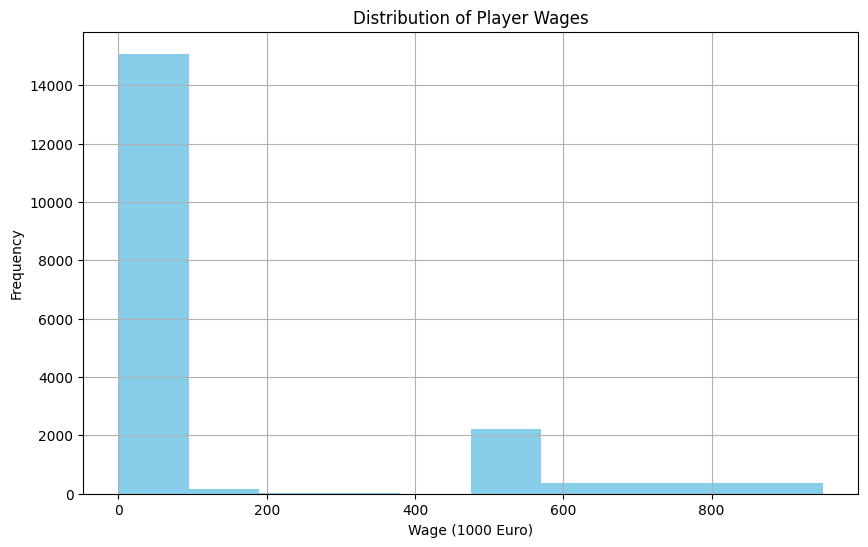

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Wage (1000 Euro)'], color='skyblue')
plt.title('Distribution of Player Wages')
plt.xlabel('Wage (1000 Euro)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

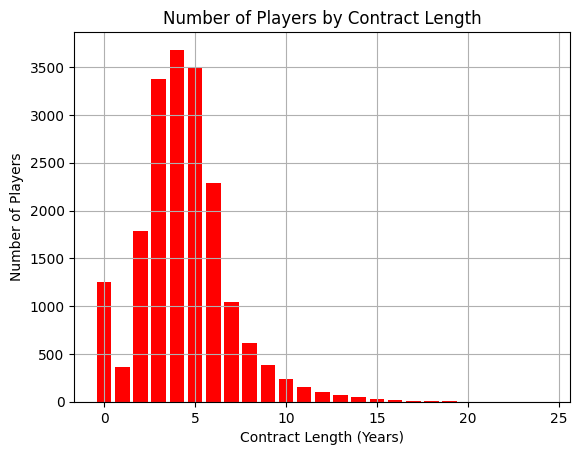

In [ ]:
# Plot bar chart of number of players by Contract Length
contract_lengths = df['Contract_Length'].value_counts()
plt.bar(contract_lengths.index, contract_lengths.values, color='red')
plt.title('Number of Players by Contract Length')
plt.xlabel('Contract Length (Years)')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()


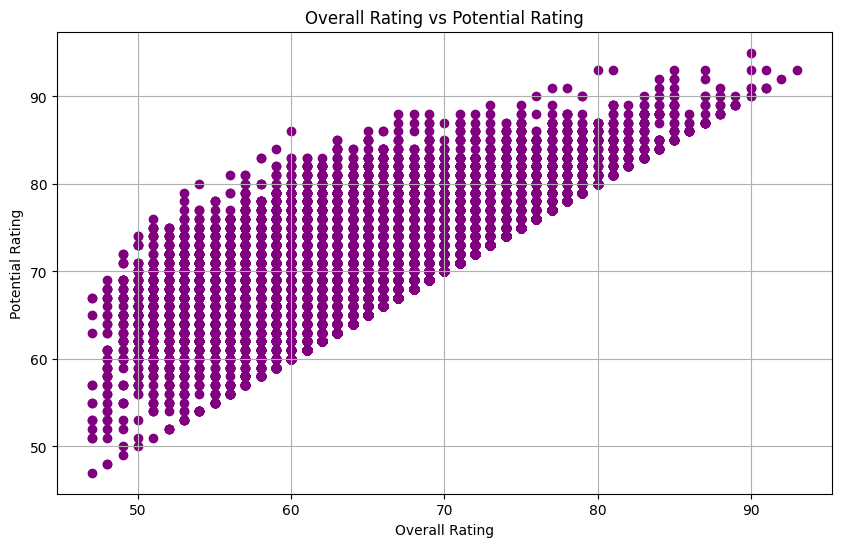

In [ ]:
# Plot scatter plot of Overall rating vs Potential rating
plt.figure(figsize=(10, 6))
plt.scatter(df['↓OVA'], df['POT'], color='purple')
plt.title('Overall Rating vs Potential Rating')
plt.xlabel('Overall Rating')
plt.ylabel('Potential Rating')
plt.grid(True)
plt.show()

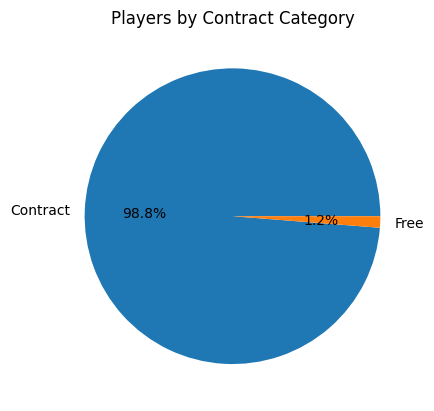

In [ ]:
# Plot pie chart of players by contract category
contract_categories = df['contract_category'].value_counts()
plt.pie(contract_categories.values, labels=contract_categories.index, autopct='%1.1f%%')
plt.title('Players by Contract Category')
plt.show()

## **Summary**
  - These analyses provide valuable insights into the characteristics of FIFA 21 players, including their overall skill level, potential, value, wages, contract situations, and physical attributes.